In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
import cv2

In [20]:
def extract_text_roi(file_name):
    img = cv2.imread(file_name)
    plt.imshow(img)

    img_final = cv2.imread(file_name)
    img2gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    ret, mask = cv2.threshold(img2gray, 180, 255, cv2.THRESH_BINARY)
    image_final = cv2.bitwise_and(img2gray, img2gray, mask=mask)
    ret, new_img = cv2.threshold(image_final, 180, 255, cv2.THRESH_BINARY)  # for black text , cv.THRESH_BINARY_INV
    '''
            line  8 to 12  : Remove noisy portion 
    '''
    kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, (3,
                                                         3))  # to manipulate the orientation of dilution , large x means horizonatally dilating  more, large y means vertically dilating more
    dilated = cv2.dilate(new_img, kernel, iterations=9)  # dilate , more the iteration more the dilation

    # for cv2.x.x

    #contours, hierarchy = cv2.findContours(dilated, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)  # get contours

    # for cv3.x.x comment above line and uncomment line below

    image, contours, hierarchy = cv2.findContours(dilated,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)

    index = 0
    for contour in contours:
        # get rectangle bounding contour
        [x, y, w, h] = cv2.boundingRect(contour)

        # Don't plot small false positives that aren't text
        if w < 35 and h < 35:
            continue

        # draw rectangle around contour on original image
        cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 255), 2)

     
        #you can crop image and send to OCR  , false detected will return no text :)
        cropped = img_final[y :y +  h , x : x + w]

        s = 'test/cropped' + '/crop_' + str(index) + '.jpg' 
        print(s)
        cv2.imwrite(s , cropped)
        index = index + 1

    # write original image with added contours to disk
    #cv2.imshow('captcha_result', img)
    #cv2.waitKey()
    #cv2.imwrite('res.jpg',' img')

test/cropped/crop_0.jpg
test/cropped/crop_1.jpg


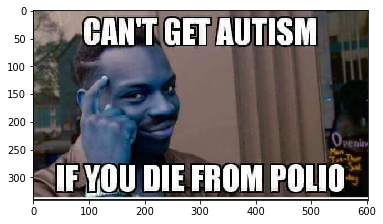

In [21]:
extract_text_roi("test/test2.jpeg")